In [4]:
import numpy as np
from sklearn_evaluation import plot
import matplotlib.pyplot as plt
import pylab 
#change plot size
#from IPython.core.pylabtools import figsize
#figsize(10, 10)

In [5]:
score_file = "../hmm/UA_DATA/ua_%d_score.txt" % 40
#score_file = "../hmm/PATH_DATA/path_%d_score.txt" % 40

MALWARE_LABEL = 1 #or the other way around 
BENIGN_LABEL = -1

minSoFar = float("inf")
maxSoFar = -float("inf")
y_test = []
y_score = []
with open(score_file, "r") as f: 
    for line in f:
        line = line.strip()
        tokens = line.split(",")
        gt = MALWARE_LABEL if tokens[0] == 'm' else BENIGN_LABEL #ground truth (gt)
        score = float(tokens[1])
        if score != float("inf") and score != -float("inf") and score < minSoFar: minSoFar = score
        if score != float("inf") and score != -float("inf") and score > maxSoFar: maxSoFar = score
        y_test.append(gt)
        y_score.append(score)
        
for i in range(len(y_score)):
    if y_score[i] == float("inf"): y_score[i] = maxSoFar + 1 #make inf slightly higher than the max so far
    if y_score[i] == -float("inf"): y_score[i] = minSoFar - 1 #make -inf slightly lower than the min so far

print(minSoFar, maxSoFar)

-135.041 -85.0364


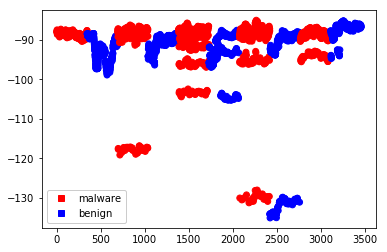

In [6]:
#scatter plot for scores
red = (1, 0, 0)
blue = (0, 0, 1)
color = np.zeros((len(y_test), 3))
for i in range(len(y_test)):
    if y_test[i] == MALWARE_LABEL: color[i] = red
    else: color[i] = blue

colors = ['red', 'blue']
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(2)]
labels = ['malware', 'benign']
plt.legend(handles, labels, loc="best", framealpha=1)

plt.scatter(np.arange(len(y_score)), np.array(y_score), c=color)

In [7]:
tm = 0
for s in y_test: 
    if s == MALWARE_LABEL: tm += 1
print("num malware %d, benign %d" % (tm, len(y_test) - tm))

num malware 1725, benign 1735


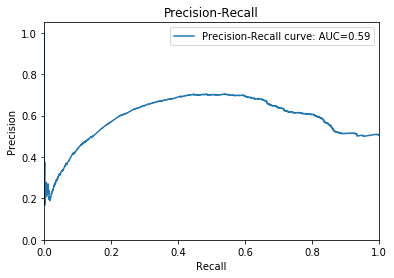

In [8]:
plot.precision_recall(np.array(y_test), np.array(y_score))

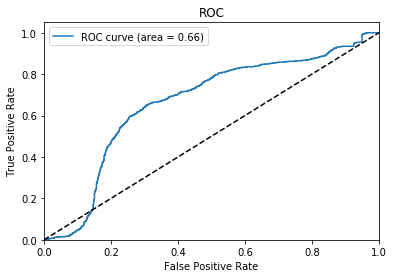

In [9]:
plot.roc(np.array(y_test), np.array(y_score))

-85.6966 -17.2564
-103.962 -38.2596
-80.3117 -58.8892
-149.1 -79.4253


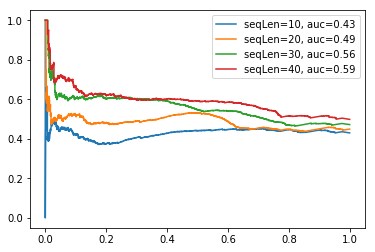

In [12]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

score_file_str = "../hmm/PATH_DATA/path_%d_score.txt"
#score_file_str = "../hmm/UA_DATA/ua_%d_score.txt"

MALWARE_LABEL = 1 #or the other way around 
BENIGN_LABEL = -1

for seqLen in [10, 20, 30, 40]:
    minSoFar = float("inf")
    maxSoFar = -float("inf")
    y_test = []
    y_score = []
    score_file = score_file_str % seqLen
    with open(score_file, "r") as f: 
        for line in f:
            line = line.strip()
            tokens = line.split(",")
            gt = MALWARE_LABEL if tokens[0] == 'm' else BENIGN_LABEL #ground truth (gt)
            score = float(tokens[1])
            if score != float("inf") and score != -float("inf") and score < minSoFar: minSoFar = score
            if score != float("inf") and score != -float("inf") and score > maxSoFar: maxSoFar = score
            y_test.append(gt)
            y_score.append(score)

    for i in range(len(y_score)):
        if y_score[i] == float("inf"): y_score[i] = maxSoFar + 1
        if y_score[i] == -float("inf"): y_score[i] = minSoFar - 1 

    print(minSoFar, maxSoFar)
    y_score = np.array(y_score)
    y_true = np.array(y_test)
    
    #fpr, tpr, thresh = metrics.roc_curve(y_true, y_score)
    #auc = metrics.roc_auc_score(y_true, y_score)
    #plt.plot(fpr,tpr,label="seqLen=%d, auc=%s" % (seqLen, str(auc)))
    
    precision, recall, thresh = metrics.precision_recall_curve(y_true, y_score)
    apr = metrics.average_precision_score(y_true, y_score)
    plt.plot(recall,precision,label="seqLen=%d, auc=%.2f" % (seqLen, apr))

plt.legend(loc=0)
plt.show()